In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cross_validation import train_test_split
import random

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
TRAIN_URL = "http://download.tensorflow.org/data/iris_training.csv"
TEST_URL = "http://download.tensorflow.org/data/iris_test.csv"
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth',
                    'PetalLength', 'PetalWidth', 'Species']
def load_data(label_name='Species'):
    """Parses the csv file in TRAIN_URL and TEST_URL."""

    # Create a local copy of the training set.
    train_path = tf.keras.utils.get_file(fname=TRAIN_URL.split('/')[-1],
                                         origin=TRAIN_URL)
    # train_path now holds the pathname: ~/.keras/datasets/iris_training.csv

    # Parse the local CSV file.
    train = pd.read_csv(filepath_or_buffer=train_path,
                        names=CSV_COLUMN_NAMES,  # list of column names
                        header=0  # ignore the first row of the CSV file.
                       )
    # train now holds a pandas DataFrame, which is data structure
    # analogous to a table.

    # 1. Assign the DataFrame's labels (the right-most column) to train_label.
    # 2. Delete (pop) the labels from the DataFrame.
    # 3. Assign the remainder of the DataFrame to train_features
    train_features, train_label = train, train.pop(label_name)

    # Apply the preceding logic to the test set.
    test_path = tf.keras.utils.get_file(TEST_URL.split('/')[-1], TEST_URL)
    test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)
    test_features, test_label = test, test.pop(label_name)

    # Return four DataFrames.
    return (train_features, train_label), (test_features, test_label)
(x_train, y_train), (x_test, y_test) = load_data()

8192/2194 [================================================================================================================]8192/2194 [================================================================================================================] - 0s 0us/step

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================]8192/573 [===============================================================================================================================================================================================================================================================================================

In [3]:
y_train = tf.one_hot(y_train,3)
y_test = tf.one_hot(y_test,3)

In [4]:
# # train_df = pd.read_csv('datatraining.txt')

# train = train_df.drop(['date'],axis=1)

# label = train_df['Occupancy']
# train = train.drop(['Occupancy'],axis=1)

# x_train, x_test,y_train,y_test = train_test_split(train, label.values.reshape(-1, 1) ,random_state = 42)

# # One hot coded
# y_train = tf.concat([1 - y_train, y_train],axis=1)
# y_test = tf.concat([1 - y_test, y_test],axis=1)

In [10]:
# 设置模型
learning_rate = 0.001
training_epochs = 20
batch_size = 1
display_step = 1

In [11]:
n_samples = x_train.shape[0]
n_features = 4
n_class = 3
x = tf.placeholder(tf.float32, [None, n_features])
y = tf.placeholder(tf.float32, [None, n_class])

In [12]:
W = tf.Variable(tf.zeros([n_features, n_class]))
b = tf.Variable(tf.zeros([n_class]))

In [13]:
pred = tf.matmul(x, W) + b

Epoch: 0001 cost= 0.00886765718460083
Epoch: 0002 cost= 0.008709706862767537
Epoch: 0003 cost= 0.008573962251345317
Epoch: 0004 cost= 0.00842898984750112
Epoch: 0005 cost= 0.008278077840805054
Epoch: 0006 cost= 0.008125983675320943
Epoch: 0007 cost= 0.007975981632868449
Epoch: 0008 cost= 0.007830037673314413
Epoch: 0009 cost= 0.007689218719800313
Epoch: 0010 cost= 0.007554008563359579
Epoch: 0011 cost= 0.007424532373746236
Epoch: 0012 cost= 0.0073006977637608845
Epoch: 0013 cost= 0.007182287176450094
Epoch: 0014 cost= 0.007069019476572672
Epoch: 0015 cost= 0.0069605926672617596
Epoch: 0016 cost= 0.006856690347194672
Epoch: 0017 cost= 0.00675700306892395
Epoch: 0018 cost= 0.006661244730154673
Epoch: 0019 cost= 0.006569143136342367
Epoch: 0020 cost= 0.006480443974335988
Optimization Finished!
Testing Accuracy: 0.96666664


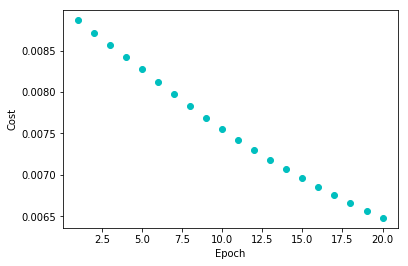

In [14]:
# 损失函数
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 准确率
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 初始化所有变量
init = tf.initialize_all_variables()

# 训练模型
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(n_samples / batch_size)
        for i in range(total_batch):
            _, c = sess.run([optimizer, cost], 
                            feed_dict={x: x_train[i * batch_size : (i+1) * batch_size], 
                                      y: y_train[i * batch_size : (i+1) * batch_size, :].eval()})
            avg_cost = c / total_batch
        plt.plot(epoch+1, avg_cost, 'co')

        if (epoch+1) % display_step == 0:
            print("Epoch:", "%04d" % (epoch+1), "cost=", avg_cost)

    print("Optimization Finished!")

    print("Testing Accuracy:", accuracy.eval({x: x_train, y:y_train.eval()}))
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.show()

In [15]:
tf.Session()
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))